In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:

X_train.shape


(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[4000]

In [6]:
single_image.shape

(28, 28)

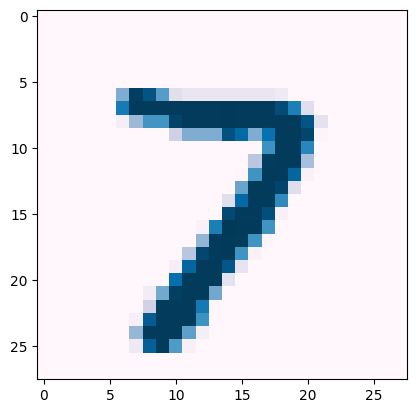

In [7]:
plt.imshow(single_image,cmap='PuBu')

In [9]:
y_train.shape

(60000,)

In [10]:

X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:

X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

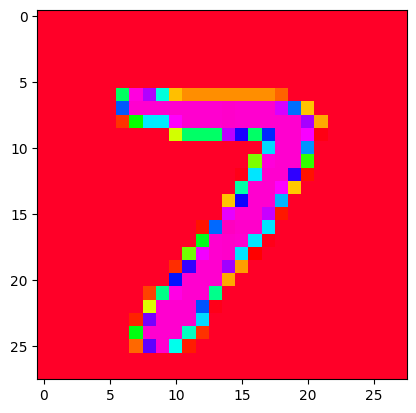

In [56]:
single_image = X_train[4000]
plt.imshow(single_image,cmap='gist_rainbow')

In [20]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [22]:
X_test_scaled.shape

(10000, 28, 28, 1)

In [23]:
print("Name : Easwari M")
print("Register Number : 212223240033")

Name : Easwari M
Register Number : 212223240033


In [24]:
classifier = keras.Sequential()
c1=layers.Input(shape=(28,28,1))
classifier.add(c1)
c2=layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')
classifier.add(c2)
c3=layers.MaxPool2D(pool_size=(2,2))
classifier.add(c3)
c4=layers.Flatten()
classifier.add(c4)
c5=layers.Dense(32,activation='relu')
classifier.add(c5)
c6=layers.Dense(64,activation='relu')
classifier.add(c6)
c7=layers.Dense(32,activation='relu')
classifier.add(c7)
c8=layers.Dense(10,activation='softmax')
classifier.add(c8)




In [25]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                        

In [26]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [27]:
classifier.fit(X_train_scaled ,y_train_onehot, epochs=4,
     batch_size=64,
     validation_data = (X_test_scaled,y_test_onehot))


Epoch 1/4
938/938 [==============================] - 18s 18ms/step - loss: 0.2525 - accuracy: 0.9248 - val_loss: 0.1029 - val_accuracy: 0.9687
Epoch 2/4
938/938 [==============================] - 13s 14ms/step - loss: 0.0785 - accuracy: 0.9754 - val_loss: 0.0654 - val_accuracy: 0.9793
Epoch 3/4
938/938 [==============================] - 14s 15ms/step - loss: 0.0551 - accuracy: 0.9830 - val_loss: 0.0550 - val_accuracy: 0.9809
Epoch 4/4
938/938 [==============================] - 14s 15ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0561 - val_accuracy: 0.9816


In [28]:
metrics = pd.DataFrame(classifier.history.history)

In [29]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.252490,0.924850,0.102853,0.9687
1,0.078539,0.975417,0.065407,0.9793
2,0.055121,0.983050,0.054955,0.9809
3,0.043966,0.986283,0.056147,0.9816


Text(0.1, 1.0, 'Easwari M : 212223240033')

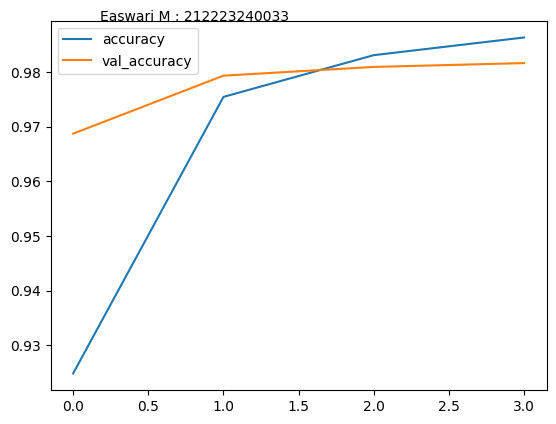

In [30]:
metrics[['accuracy','val_accuracy']].plot()
plt.text(0.1, 1.0, f'Easwari M : 212223240033', transform=plt.gca().transAxes)

Text(0.1, 0.9, 'Easwari M : 212223240033')

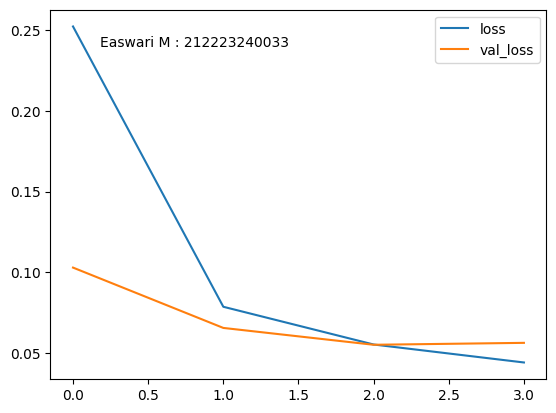

In [31]:
metrics[['loss','val_loss']].plot()
plt.text(0.1, 0.9, f'Easwari M : 212223240033', transform=plt.gca().transAxes)

In [32]:
x_test_predictions = np.argmax(classifier.predict(X_test_scaled), axis=1)


313/313 [==============================] - 1s 3ms/step


In [74]:
print("Name : Easwari M")
print("Register No : 212223240033")
print(confusion_matrix(y_test,x_test_predictions))

Name : Easwari M
Register No : 212223240033
[[ 974    0    1    0    0    0    3    0    1    1]
 [   0 1131    3    0    0    0    0    0    1    0]
 [   3    6 1014    0    2    0    0    3    4    0]
 [   0    0    5  995    0    5    0    0    5    0]
 [   1    0    0    0  974    0    1    0    1    5]
 [   0    1    0    5    0  881    4    0    1    0]
 [   7    2    1    0    2    3  942    0    1    0]
 [   2   16   14    1    2    1    0  985    2    5]
 [   5    2    3    0    0    2    1    2  959    0]
 [   4    4    0    4    6   14    0    4   12  961]]


In [73]:
print(classification_report(y_test,x_test_predictions))
print("Name : Easwari M")
print("Register No : 212223240033")

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      1.00      0.98      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.98      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Name : Easwari M
Register No : 212223240033


In [57]:
img = image.load_img('n.webp')


In [58]:
type(img)

PIL.WebPImagePlugin.WebPImageFile

In [63]:
img = image.load_img('n.webp')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [64]:
x_single_prediction = np.argmax(
    classifier.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 14ms/step


In [65]:
print(x_single_prediction)


[8]


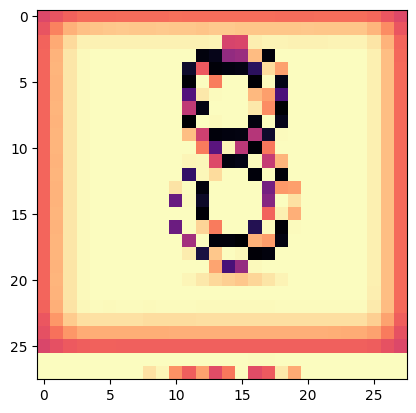

In [68]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='magma')

In [69]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [70]:

x_single_prediction = np.argmax(
    classifier.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 14ms/step


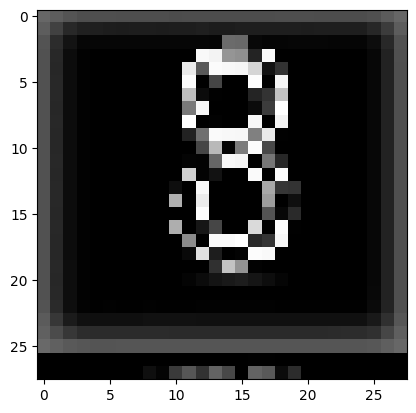

In [71]:
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')